In [1]:
from google.colab import drive
drive.mount("/content/drive")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (10, 7)

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data=pd.read_csv('/content/drive/My Drive/Güncel Konular/veri/veri.csv',encoding="ISO-8859-1")
data_tarihsiz = data.select_dtypes(include=['float64'])
data_tarihsiz.head()


 

,PM10,SO2,CO,NO2,NOX,NO
0,21.417008,4.629833,605.988096,31.849611,46.945543,15.095931
1,20.477077,5.933857,800.393350,47.038542,77.533957,30.495416
2,38.253211,6.401385,911.299383,51.612556,98.944691,47.332137
3,35.534459,6.913496,952.646500,48.410507,82.663605,34.253095
4,39.670834,6.343282,1056.357483,47.683113,91.553461,43.870343


In [4]:
data.dtypes

Tarih     object
PM10     float64
SO2      float64
CO       float64
NO2      float64
NOX      float64
NO       float64
dtype: object

In [5]:
data_tarih = data.select_dtypes(include=['object'])
data_tarih.head()

,Tarih
0,1/1/2020
1,1/2/2020
2,1/3/2020
3,1/4/2020
4,1/5/2020


In [6]:
data_tarihsiz.describe().T

,count,mean,std,min,25%,50%,75%,max
PM10,136.0,44.432776,26.712811,9.958241,25.114722,37.185330,55.674562,139.652997
SO2,136.0,5.738041,3.605287,1.113484,2.900947,5.199122,7.449457,18.423953
CO,136.0,875.498821,380.540060,407.386700,572.044346,784.988175,1088.569854,2116.150033
NO2,109.0,51.433578,20.822738,14.722220,34.523171,47.038542,64.147297,112.399083
NOX,109.0,97.882481,69.172506,15.922980,42.480553,74.769960,130.512952,333.211312
NO,109.0,46.460232,49.788061,1.200764,8.083986,25.419030,65.606022,232.664927


In [7]:
from fancyimpute import KNN #KNN ile boş veri doldurma
var_tarih = list(data_tarih)
var_maddeler = list(data_tarihsiz)
knn_imp = KNN(k=7).fit_transform(data_tarihsiz);#knn ile boş değerleri doldurdum
knn_imp[0:10]

Using TensorFlow backend.


Imputing row 1/136 with 0 missing, elapsed time: 0.006
Imputing row 101/136 with 0 missing, elapsed time: 0.006


array([[  21.41700792,    4.62983255,  605.9880958 ,   31.84961117,
          46.94554261,   15.095931  ],
       [  20.47707658,    5.9338566 ,  800.39335   ,   47.03854167,
          77.53395707,   30.49541613],
       [  38.25321083,    6.40138546,  911.2993833 ,   51.61255625,
          98.9446911 ,   47.33213654],
       [  35.53445888,    6.91349563,  952.6465    ,   48.41050708,
          82.66360476,   34.25309542],
       [  39.67083375,    6.34328225, 1056.357483  ,   47.68311292,
          91.55346077,   43.87034325],
       [  75.23322875,   11.17238763, 1531.367717  ,   64.0176625 ,
         171.7715995 ,  107.7539394 ],
       [ 124.2979071 ,   18.19544338, 2018.308662  ,   84.57318875,
         264.8547582 ,  180.2815675 ],
       [  66.62213125,    8.82786558, 1155.928021  ,   59.63570542,
         114.5462482 ,   54.91054571],
       [  22.31774133,    5.75514239,  609.9138217 ,   29.85163517,
          42.4245394 ,   12.57290309],
       [  28.52259833,    7.07750987,

In [8]:
df = pd.DataFrame(knn_imp)
df.head()

,0,1,2,3,4,5
0,21.417008,4.629833,605.988096,31.849611,46.945543,15.095931
1,20.477077,5.933857,800.393350,47.038542,77.533957,30.495416
2,38.253211,6.401385,911.299383,51.612556,98.944691,47.332137
3,35.534459,6.913496,952.646500,48.410507,82.663605,34.253095
4,39.670834,6.343282,1056.357483,47.683113,91.553461,43.870343


In [9]:
df.columns = var_maddeler
df = pd.concat([data_tarih, df], axis=1, sort=False)
df.head()

,Tarih,PM10,SO2,CO,NO2,NOX,NO
0,1/1/2020,21.417008,4.629833,605.988096,31.849611,46.945543,15.095931
1,1/2/2020,20.477077,5.933857,800.393350,47.038542,77.533957,30.495416
2,1/3/2020,38.253211,6.401385,911.299383,51.612556,98.944691,47.332137
3,1/4/2020,35.534459,6.913496,952.646500,48.410507,82.663605,34.253095
4,1/5/2020,39.670834,6.343282,1056.357483,47.683113,91.553461,43.870343


In [10]:
df.isnull().sum()

Tarih    0
PM10     0
SO2      0
CO       0
NO2      0
NOX      0
NO       0
dtype: int64

In [11]:
## So2 indeksi (si) hesaplama fonksiyonu
#Hava kalitesi indeksini hesaplamak için havadaki her bir maddenin indeksini hesapladım
#Aralıkları internetten aldım
def calculate_si(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    if (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    if (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    if (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/800)
    if (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    if (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
data['si']=data['SO2'].apply(calculate_si)
df= data[['SO2','si']]
df.head()

,SO2,si
0,4.629833,5.787291
1,5.933857,7.417321
2,6.401385,8.001732
3,6.913496,8.641870
4,6.343282,7.929103


In [12]:
#No2 indeksi (ni) hesaplama fonksiyonu
def calculate_ni(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-14)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
data['ni']=data['NO2'].apply(calculate_ni)
df= data[['NO2','ni']]
df.head()

,NO2,ni
0,31.849611,39.812014
1,47.038542,91.298177
2,51.612556,97.015695
3,48.410507,93.013134
4,47.683113,92.103891


In [13]:
#PM10 indeksi (rpi) hesaplama fonksiyonu
def calculate_(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
data['rpi']=data['PM10'].apply(calculate_si)
df= data[['PM10','rpi']]
df.head()


,PM10,rpi
0,21.417008,26.771260
1,20.477077,25.596346
2,38.253211,47.816514
3,35.534459,44.418074
4,39.670834,49.588542


In [14]:
#NO indeksi (spi) hesaplama fonksiyonu
def calculate_spi(spm):
    spi=0
    if(spm<=50):
     spi=spm
    if(spm<50 and spm<=100):
     spi=spm
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)
    elif(spm>350 and spm<=450):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/80)
    return spi
data['spi']=data['NO'].apply(calculate_spi)
df= data[['NO','spi']]
df.head()

,NO,spi
0,15.095931,15.095931
1,30.495416,30.495416
2,47.332137,47.332137
3,34.253095,34.253095
4,43.870343,43.870343


In [15]:
#Her veri değerinin hava kalitesi indeksini (AQI) hesaplama fonksiyonu
def calculate_aqi(si,ni,spi,rpi):
    aqi=0
    if(si>ni and si>spi and si>rpi):
     aqi=si
    if(spi>si and spi>ni and spi>rpi):
     aqi=spi
    if(ni>si and ni>spi and ni>rpi):
     aqi=ni
    if(rpi>si and rpi>ni and rpi>spi):
     aqi=rpi
    return aqi
data['AQI']=data.apply(lambda x:calculate_aqi(x['si'],x['ni'],x['spi'],x['rpi']),axis=1)

data = data[['Tarih', 'si', 'ni', 'spi', 'rpi', 'AQI']]
data.dtypes
 

Tarih     object
si       float64
ni       float64
spi      float64
rpi      float64
AQI      float64
dtype: object

In [16]:
data_tarihsiz = data.select_dtypes(include=['float64'])
data_tarihsiz.head()

,si,ni,spi,rpi,AQI
0,5.787291,39.812014,15.095931,26.771260,39.812014
1,7.417321,91.298177,30.495416,25.596346,91.298177
2,8.001732,97.015695,47.332137,47.816514,97.015695
3,8.641870,93.013134,34.253095,44.418074,93.013134
4,7.929103,92.103891,43.870343,49.588542,92.103891


In [17]:
data_tarihsiz.describe().T

,count,mean,std,min,25%,50%,75%,max
si,136.0,7.172551,4.506609,1.391855,3.626184,6.498902,9.311821,23.029942
ni,109.0,82.112681,33.107680,18.402775,43.153964,91.298177,108.963090,132.399083
spi,109.0,22.317787,54.688023,-74.104776,3.576287,11.154170,33.369160,188.443284
rpi,136.0,53.057102,26.976914,12.447801,31.393403,46.481663,69.593203,119.884332
AQI,136.0,68.568407,47.181461,0.000000,34.634519,84.362302,107.956724,188.443284


In [18]:
data_tarih = data.select_dtypes(include=['object'])
data_tarih.head()


,Tarih
0,1/1/2020
1,1/2/2020
2,1/3/2020
3,1/4/2020
4,1/5/2020


In [19]:
from fancyimpute import KNN #KNN ile boş veri doldurma
var_tarih = list(data_tarih)
var_maddeler = list(data_tarihsiz)
knn_imp = KNN(k=7).fit_transform(data_tarihsiz);#knn ile boş değerleri doldurdum
knn_imp[0:10]

Imputing row 1/136 with 0 missing, elapsed time: 0.013
Imputing row 101/136 with 0 missing, elapsed time: 0.014


array([[  5.78729069,  39.81201396,  15.095931  ,  26.7712599 ,
         39.81201396],
       [  7.41732075,  91.29817709,  30.49541613,  25.59634572,
         91.29817709],
       [  8.00173182,  97.01569531,  47.33213654,  47.81651354,
         97.01569531],
       [  8.64186953,  93.01313385,  34.25309542,  44.4180736 ,
         93.01313385],
       [  7.92910281,  92.10389115,  43.87034325,  49.58854219,
         92.10389115],
       [ 13.96548454, 112.52207813, 105.16929293,  94.04153594,
        112.52207813],
       [ 22.74430423, 104.57318875, 153.521045  , 114.76596903,
        153.521045  ],
       [ 11.03483198, 107.04463177, -68.86181786,  83.27766406,
        107.04463177],
       [  7.19392799,  37.31454396,  12.57290309,  27.89717666,
         37.31454396],
       [  8.84688734,  83.92187344,  23.09448492,  35.65324791,
         83.92187344]])

In [20]:
df = pd.DataFrame(knn_imp)
df.head()

,0,1,2,3,4
0,5.787291,39.812014,15.095931,26.771260,39.812014
1,7.417321,91.298177,30.495416,25.596346,91.298177
2,8.001732,97.015695,47.332137,47.816514,97.015695
3,8.641870,93.013134,34.253095,44.418074,93.013134
4,7.929103,92.103891,43.870343,49.588542,92.103891


In [21]:
df.columns = var_maddeler
df = pd.concat([data_tarih, df], axis=1, sort=False)
df.head()

,Tarih,si,ni,spi,rpi,AQI
0,1/1/2020,5.787291,39.812014,15.095931,26.771260,39.812014
1,1/2/2020,7.417321,91.298177,30.495416,25.596346,91.298177
2,1/3/2020,8.001732,97.015695,47.332137,47.816514,97.015695
3,1/4/2020,8.641870,93.013134,34.253095,44.418074,93.013134
4,1/5/2020,7.929103,92.103891,43.870343,49.588542,92.103891


In [22]:
df.isnull().sum()

Tarih    0
si       0
ni       0
spi      0
rpi      0
AQI      0
dtype: int64

In [0]:
df = df[:-26]
dataset_test = df.copy()
dataset_train = df.copy()
 
data = df

In [0]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.layers import LSTM, Flatten, BatchNormalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

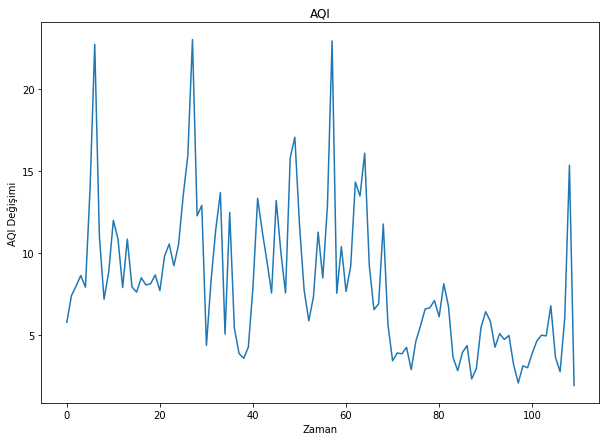

In [25]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("Zaman")
plt.ylabel("AQI Değişimi")
plt.title("AQI")
plt.show()

In [26]:
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(110, 1)

In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [28]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("Eğitim Boyutu: {}, Test Boyutu: {} ".format(len(train), len(test)))

Eğitim Boyutu: 55, Test Boyutu: 55 


In [0]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
trainX = numpy.array(dataX)
trainY = numpy.array(dataY)  


In [0]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
testX = numpy.array(dataX)
testY = numpy.array(dataY)  

In [0]:
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# LSTM Model
model = Sequential()
model.add(LSTM(1024, input_shape=(1, time_stemp)))  
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=1000, batch_size=32)


In [33]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Eğitim Skor: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Skor: %.2f RMSE' % (testScore))

Eğitim Skor: 2.16 RMSE
Test Skor: 3.81 RMSE


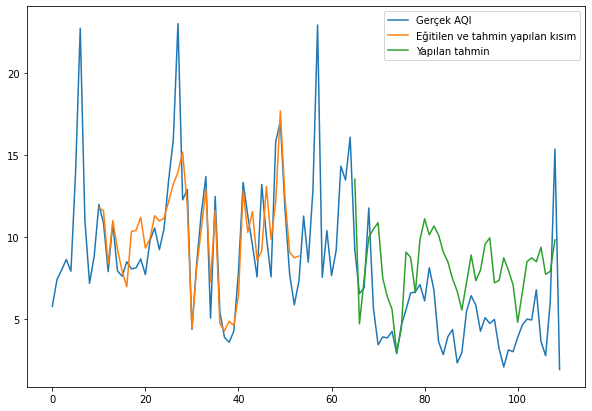

In [34]:
# shifting train
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset),label = 'Gerçek AQI')
plt.plot(trainPredictPlot, label = 'Eğitilen ve tahmin yapılan kısım') 
plt.plot(testPredictPlot, label = 'Yapılan tahmin')
plt.legend()
#plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted AQI')
plt.show()